In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.patches import Rectangle, Ellipse

In [2]:
def set_axes_fontsize(ax,fontsize):
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(fontsize)
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(fontsize)

## optimise the waveguide length by computing the number of photons arriving at the detector as a function of the waveguide length for several options

In [3]:
path = '/Users/erezcohen/Desktop/data/DuSiHodSim/output/csv_files/';

In [25]:
def ComputeNPhotonsArrivingAtDetector(  version=8.0,
                                        WGname = 'WGfrontSide40_length300',
                                        r_PMT = (20/2) * 2.54, # 2'' PMT
                                        aSiPM = 3, # [mm]
                                        NSiPMs = 30,
                                        xSiPMs = [-10, -5 , 0 , 5 , 10],
                                        ySiPMs = [-15, -10 , -5 , 5 , 10 , 15], 
                                        fdebug=0
                                     ): 

    scenario_name='version_%.1f_EJ204_%s_photons.csv'%(version,WGname)
    sim_results = pd.read_csv(path + scenario_name);
    
    ArrivedAtFrontFacet = sim_results[  (sim_results['ArrivedAtFrontFacet']==1)                                       
                                      & (sim_results['AbsorbedInScintillator']==0)                                     
                                      & (sim_results['HitBackFacet']==0)]
    
    ArrivedAtWaveguideExit = ArrivedAtFrontFacet[(ArrivedAtFrontFacet['ArrivedAtWaveguideExit']==1) 
                                                 & (ArrivedAtFrontFacet['AbsorbedInWaveguide']==0)]

    Ntotal = len(sim_results)
    NArrivedAtFrontFacet = len(ArrivedAtFrontFacet)
    NArrivedAtWaveguideExit = len(ArrivedAtWaveguideExit)

    if fdebug:#{
        print Ntotal,'photons were produced in  the scintillator'
        print '%.1f'%(100.*float(NArrivedAtFrontFacet)/Ntotal)+'% arrived at front facet and not absorbed in scintillator'
        print '%.1f'%(100.*float(NArrivedAtWaveguideExit)/NArrivedAtFrontFacet)+'% of these arrived at waveguide exit and not absorbed in waveguide'
    #}
    
    
    # in PMT    
    InPMTarea = ArrivedAtWaveguideExit[ (np.square(ArrivedAtWaveguideExit.HitWaveguideExitPosX) 
                                      + np.square(ArrivedAtWaveguideExit.HitWaveguideExitPosY)) 
                                        <= np.square(r_PMT) ]

    # in SiPM array
    InSiPMarea = pd.DataFrame();
    for xSiPM in xSiPMs:#{
        for ySiPM in ySiPMs:#{
            InSiPMarea = pd.concat([InSiPMarea , 
                                    ArrivedAtWaveguideExit[   (np.abs((ArrivedAtWaveguideExit.HitWaveguideExitPosX-xSiPM))< float(aSiPM)/2)                        
                                                            & (np.abs((ArrivedAtWaveguideExit.HitWaveguideExitPosY-ySiPM))< float(aSiPM)/2)] ])
        #}
    #}

    return [InPMTarea,InSiPMarea,ArrivedAtWaveguideMarginExit]

In [26]:
def ComputeNPhotonsArrivingAtWGmarginExit(  version=8.0,
                                        WGname = 'WGfrontSide40_length300',
                                        r_PMT = (20/2) * 2.54, # 2'' PMT
                                        aSiPM = 3, # [mm]
                                        NSiPMs = 30,
                                        xSiPMs = [-10, -5 , 0 , 5 , 10],
                                        ySiPMs = [-15, -10 , -5 , 5 , 10 , 15], 
                                        fdebug=0
                                     ): 

    scenario_name='version_%.1f_EJ204_%s_photons.csv'%(version,WGname)
    sim_results = pd.read_csv(path + scenario_name);
    
    ArrivedAtFrontFacet = sim_results[  (sim_results['ArrivedAtFrontFacet']==1)                                       
                                      & (sim_results['AbsorbedInScintillator']==0)                                     
                                      & (sim_results['HitBackFacet']==0)]
    
    ArrivedAtWaveguideMarginExit = ArrivedAtFrontFacet[(ArrivedAtFrontFacet['ArrivedAtWaveguideMarginExit']==1) 
                                                 & (ArrivedAtFrontFacet['AbsorbedInWaveguide']==0)]

    # in PMT    
    InPMTarea = ArrivedAtWaveguideMarginExit[ (np.square(ArrivedAtWaveguideMarginExit.HitWaveguideMarginExitPosX) 
                                      + np.square(ArrivedAtWaveguideMarginExit.HitWaveguideMarginExitPosY)) 
                                        <= np.square(r_PMT) ]

    # in SiPM array
    InSiPMarea = pd.DataFrame();
    for xSiPM in xSiPMs:#{
        for ySiPM in ySiPMs:#{
            InSiPMarea = pd.concat([InSiPMarea , 
                                    ArrivedAtWaveguideMarginExit[   (np.abs((ArrivedAtWaveguideMarginExit.HitWaveguideMarginExitPosX-xSiPM))< float(aSiPM)/2)                        
                                                            & (np.abs((ArrivedAtWaveguideMarginExit.HitWaveguideMarginExitPosY-ySiPM))< float(aSiPM)/2)] ])
        #}
    #}

    return [InPMTarea,InSiPMarea,ArrivedAtWaveguideMarginExit]

In [5]:
NPMT30,NSiPM30,NPMT40,NSiPM40,NPMT60,NSiPM60,NPMT30x60,NSiPM30x60=[],[],[],[],[],[],[],[]
lWG_arr=[50,100,150,200,250,300]

for lIdx in np.arange(0,len(lWG_arr)):
    # print lIdx
    lWG = lWG_arr[lIdx];
    
    [InPMTarea,InSiPMarea,ArrivedAtWaveguideMarginExit] = ComputeNPhotonsArrivingAtDetector(version=8.0,WGname='WGfrontSide30_length%d'%lWG);
    NPMT30.append(len(InPMTarea));
    NSiPM30.append(len(InSiPMarea));    

    [InPMTarea,InSiPMarea,ArrivedAtWaveguideMarginExit] = ComputeNPhotonsArrivingAtDetector(version=8.0,WGname='WGfrontSide40_length%d'%lWG);
    NPMT40.append(len(InPMTarea));
    NSiPM40.append(len(InSiPMarea));    


    [InPMTarea,InSiPMarea,ArrivedAtWaveguideMarginExit] = ComputeNPhotonsArrivingAtDetector(version=8.0,WGname='WGfrontSide60_length%d'%lWG);
    NPMT60.append(len(InPMTarea));
    NSiPM60.append(len(InSiPMarea));    

    [InPMTarea,InSiPMarea,ArrivedAtWaveguideMarginExit] = ComputeNPhotonsArrivingAtDetector(version=8.0,WGname='WGfrontSide30x60_length%d'%lWG);
    NPMT30x60.append(len(InPMTarea));
    NSiPM30x60.append(len(InSiPMarea));    


print 'done.'

done.


In [16]:
lWG = 200

[InPMTarea,InSiPMarea,ArrivedAtWaveguideMarginExit] = ComputeNPhotonsArrivingAtWGmarginExit(version=9.0,WGname='WGfrontSide30_length%d_margin1cm'%lWG);
NPMT30_margin1cm = len(InPMTarea);
NSiPM30_margin1cm = len(InSiPMarea);    

[InPMTarea,InSiPMarea,ArrivedAtWaveguideMarginExit] = ComputeNPhotonsArrivingAtWGmarginExit(version=9.0,WGname='WGfrontSide30_length%d_margin5cm'%lWG);
NPMT30_margin5cm = len(InPMTarea);
NSiPM30_margin5cm = len(InSiPMarea);    

[InPMTarea,InSiPMarea,ArrivedAtWaveguideMarginExit] = ComputeNPhotonsArrivingAtWGmarginExit(version=9.0,WGname='WGfrontSide30_length%d_margin10cm'%lWG);
NPMT30_margin10cm = len(InPMTarea);
NSiPM30_margin10cm = len(InSiPMarea);  

[InPMTarea,InSiPMarea,ArrivedAtWaveguideMarginExit] = ComputeNPhotonsArrivingAtWGmarginExit(version=9.0,WGname='WGfrontSide30_length%d_margin100cm'%lWG);
NPMT30_margin100cm = len(InPMTarea);
NSiPM30_margin100cm = len(InSiPMarea);    

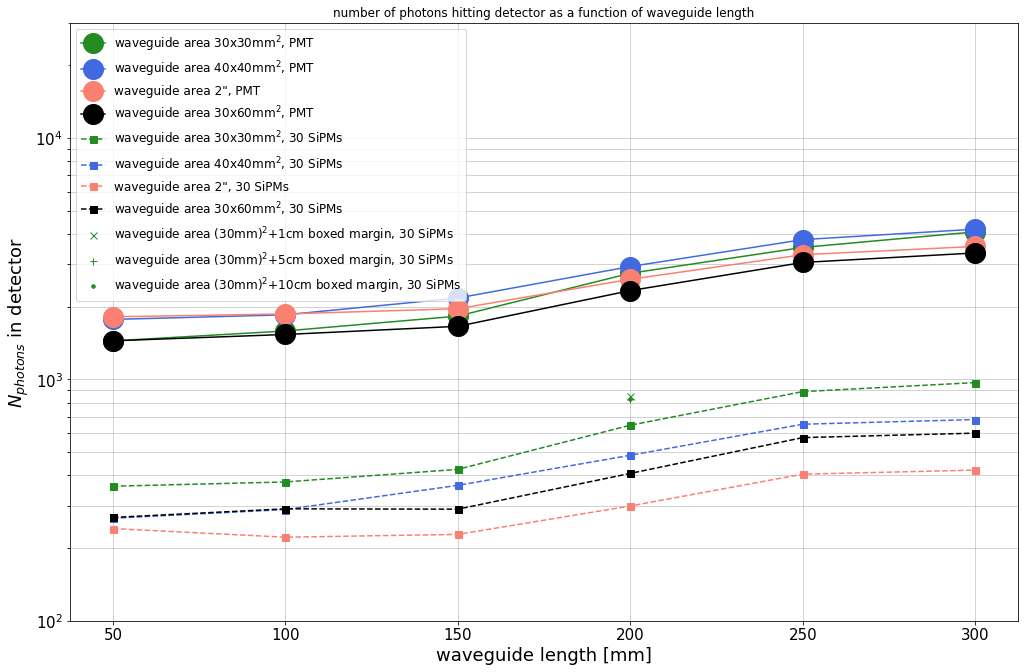

In [24]:
figure,ax = plt.subplots(figsize=(17,11));
color30 = 'forestgreen'
color40 = 'royalblue'
color60 = 'salmon'
color30x60 = 'black'

plt.plot(lWG_arr,NPMT30,'o-',color=color30,label='waveguide area 30x30mm$^2$, PMT',markersize=20)
plt.plot(lWG_arr,NPMT40,'o-',color=color40,label='waveguide area 40x40mm$^2$, PMT',markersize=20)
plt.plot(lWG_arr,NPMT60,'o-',color=color60,label='waveguide area 2", PMT',markersize=20)
plt.plot(lWG_arr,NPMT30x60,'o-',color=color30x60,label='waveguide area 30x60mm$^2$, PMT',markersize=20)

plt.plot(lWG_arr,NSiPM30,'s--',color=color30,label='waveguide area 30x30mm$^2$, 30 SiPMs',markersize=7)
plt.plot(lWG_arr,NSiPM40,'s--',color=color40,label='waveguide area 40x40mm$^2$, 30 SiPMs',markersize=7)
plt.plot(lWG_arr,NSiPM60,'s--',color=color60,label='waveguide area 2", 30 SiPMs',markersize=7)
plt.plot(lWG_arr,NSiPM30x60,'s--',color=color30x60,label='waveguide area 30x60mm$^2$, 30 SiPMs',markersize=7)
plt.plot([200],NPMT30_margin1cm,'x',color=color30,label='waveguide area (30mm)$^2$+1cm boxed margin, 30 SiPMs',markersize=7)
plt.plot([200],NPMT30_margin5cm,'+',color=color30,label='waveguide area (30mm)$^2$+5cm boxed margin, 30 SiPMs',markersize=7)
plt.plot([200],NPMT30_margin10cm,'.',color=color30,label='waveguide area (30mm)$^2$+10cm boxed margin, 30 SiPMs',markersize=7)




ax.set_xlabel('waveguide length [mm]',fontsize=18);
ax.set_ylabel('$N_{photons}$ in detector',fontsize=18);
ax.set_title('number of photons hitting detector as a function of waveguide length');
set_axes_fontsize(ax,15)

# ax.legend(bbox_to_anchor=(1,1.05),fontsize=15);
ax.legend(fontsize=12,loc='upper left');
ax.set_ylim(1e2,3e4);
ax.set_yscale('log')
ax.set_yticks(np.concatenate([np.arange(1e2,1e3,1e2) , np.arange(1e3,1e4,1e3), [1e4]]));
ax.grid('--',alpha=0.7)

## we expected that adding a box will not cause a substaintial lost of ligth But why should it increase the amount of ligth ?
The reason is that the photons arriving at the light-guide exit facet spread mainly in the periphery. 
When they are propagated additionally in a squared cross-sectional waveguide even a few mm long, they spread in the x-y plane is more homogenously. 
Since the SiPMs are spread in the simulation homogenously along the waveguide exit facet with some inter-seperation, they will detect more photons if these spread in the x-y plane is more homogenously.

In [27]:
lWG = 200
[InPMTarea,InSiPMarea,HitWGMarginExit] = ComputeNPhotonsArrivingAtWGmarginExit(version=9.0,WGname='WGfrontSide30_length%d_margin1cm'%lWG);

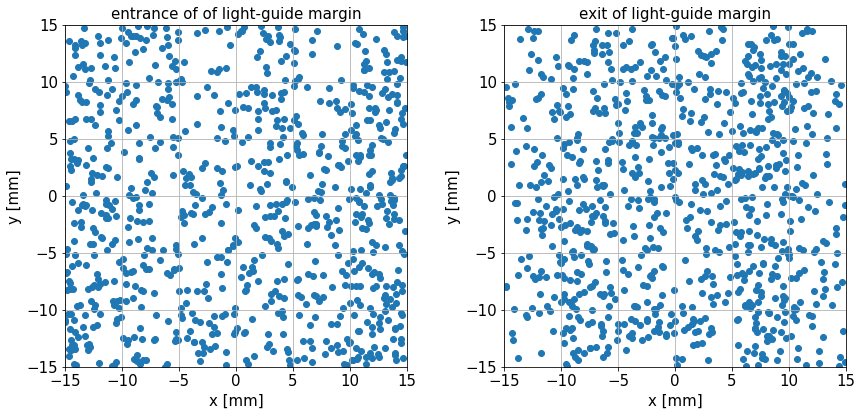

In [49]:

figure = plt.figure(figsize=(12,8));
ax = figure.add_subplot(1,2,1)
plt.scatter( HitWGMarginExit.HitWaveguideExitPosX, HitWGMarginExit.HitWaveguideExitPosY , marker='o')
ax.set_xlabel('x [mm]',fontsize=15);
ax.set_ylabel('y [mm]',fontsize=15);
set_axes_fontsize(ax,15)
ax.set_aspect('equal')
ax.grid()
plt.tight_layout()
ax.set_xlim(-15,15);ax.set_ylim(-15,15)
ax.set_title('entrance of of light-guide margin',fontsize=15);

ax = figure.add_subplot(1,2,2)
plt.scatter( HitWGMarginExit.HitWaveguideMarginExitPosX, HitWGMarginExit.HitWaveguideMarginExitPosY , marker='o')
ax.set_xlabel('x [mm]',fontsize=15);
ax.set_ylabel('y [mm]',fontsize=15);
set_axes_fontsize(ax,15)
ax.set_aspect('equal')
ax.set_title('exit of light-guide margin',fontsize=15);
ax.grid()
plt.tight_layout()
ax.set_xlim(-15,15);ax.set_ylim(-15,15);